<font face="Calibri" size="2"> <i>SBAE - Notebook Series - Part 2c, version 0.1, October 2022. Andreas Vollrath, UN-Food and Agricultural Organization, Rome</i>
</font>

![title](images/header.png)

# II - C SBAE Time-Series Extraction & Change Detection
### Add time-series outputs for already extracted time-series data
-------

In this notebook you can find example code of how to add ts algorithms outputs a posteriori.


In [1]:
import pandas as pd
import helpers as h
from pathlib import Path

/home/sepal-user/.local/lib/python3.8/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.10.3-CAPI-1.16.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/bfast/__init__.py:10: UserWarning: cupy is not available in this environment, GPU fonctionnalities won't be available
  warn("cupy is not available in this environment, GPU fonctionnalities won't be available")


### 1 - Read dataframe an config file

In [3]:
# the folder, where your results and config file are stored
#results_dir = '/home/sepal-user/project/sbae_point_analysis/results'
results_dir = '/home/sepal-user/kenya_new/sbae_point_analysis/results_ref/'

# read dataframe
#df = pd.read_pickle(Path(results_dir).joinpath(
#    'here is where your results pickle filename goes'
#))
#df = pd.read_pickle(Path(results_dir).joinpath('results_Landsat_ndfi_2005-01-01_2013-01-01_2018-01-01_0.2.pickle'))

# read config file
#config_file = Path(results_dir).joinpath('config.json')
#with open(config_file) as f:
#    config_dict = json.load(f)

### 2 - Add JRC NRT algorithms

In [4]:
tmpdir = Path(results_dir).joinpath('tmp')
tmpdir.mkdir(parents=True, exist_ok=True)

chunk_size = 300 # good for a m4 with 16gb of RAM, you can adapt with higher ram instances

#def split_dataframe(df, chunk_size = chunk_size): 
#    chunks = list()
#    num_chunks = len(df) // chunk_size + 1
#    for i in range(num_chunks):
#        chunks.append(df[i*chunk_size:(i+1)*chunk_size])
#    return chunks
#
#chunks = split_dataframe(df)
#
#
#for i, chunk in enumerate(chunks):
#    print(f'{i+1} of {len(chunks)} processed')
#    if not tmpdir.joinpath(f'{i}_tmp_nrt.pickle').exists():
#        tmp_df = h.run_jrc_nrt(chunk, config_dict)
#        tmp_df.to_pickle(tmpdir.joinpath(f'{i}_tmp_nrt.pickle'))
#
tmpfiles = tmpdir.glob('*_tmp_nrt.pickle')

df_list=[]
for file in tmpfiles:
    print(file)
    df_list.append(pd.read_pickle(file))

print('here')
final_df = pd.concat(df_list)

/home/sepal-user/kenya_new/sbae_point_analysis/results_ref/tmp/322_tmp_nrt.pickle
/home/sepal-user/kenya_new/sbae_point_analysis/results_ref/tmp/160_tmp_nrt.pickle
/home/sepal-user/kenya_new/sbae_point_analysis/results_ref/tmp/403_tmp_nrt.pickle
/home/sepal-user/kenya_new/sbae_point_analysis/results_ref/tmp/241_tmp_nrt.pickle
/home/sepal-user/kenya_new/sbae_point_analysis/results_ref/tmp/34_tmp_nrt.pickle
/home/sepal-user/kenya_new/sbae_point_analysis/results_ref/tmp/70_tmp_nrt.pickle
/home/sepal-user/kenya_new/sbae_point_analysis/results_ref/tmp/205_tmp_nrt.pickle
/home/sepal-user/kenya_new/sbae_point_analysis/results_ref/tmp/124_tmp_nrt.pickle
/home/sepal-user/kenya_new/sbae_point_analysis/results_ref/tmp/340_tmp_nrt.pickle
/home/sepal-user/kenya_new/sbae_point_analysis/results_ref/tmp/7_tmp_nrt.pickle
/home/sepal-user/kenya_new/sbae_point_analysis/results_ref/tmp/421_tmp_nrt.pickle
/home/sepal-user/kenya_new/sbae_point_analysis/results_ref/tmp/52_tmp_nrt.pickle
/home/sepal-user/keny

In [6]:
final_df.head()

,LON,LAT,PLOTID,aspect,bb_tileID,dw_class_mode,dw_tree_prob__max,dw_tree_prob__min,dw_tree_prob__stdDev,dw_tree_prob_mean,...,bs_slope_min,ewma_jrc_date,ewma_jrc_change,ewma_jrc_magnitude,mosum_jrc_date,mosum_jrc_change,mosum_jrc_magnitude,cusum_jrc_date,cusum_jrc_change,cusum_jrc_magnitude
0,39.932878,2.677580,34434,285.0,34434,5.0,24.0,2.0,6.0,10.0,...,-784.364209,16449.0,1.0,-3036.984561,0.0,0.0,0.217643,0.0,0.0,0.101500
1,39.986851,2.677537,34437,316.0,34437,7.0,8.0,1.0,1.0,2.0,...,-89.980179,0.0,0.0,-103.267023,16057.0,1.0,1.933227,15769.0,1.0,1.884854
2,40.040819,2.677492,34440,123.0,34440,5.0,14.0,1.0,3.0,6.0,...,-699.911013,16609.0,1.0,1981.507266,0.0,0.0,0.084477,16041.0,1.0,1.397238
3,40.094790,2.677445,34443,115.0,34443,5.0,25.0,1.0,5.0,5.0,...,-682.553287,16801.0,1.0,2767.520306,0.0,0.0,-0.029756,15857.0,1.0,1.112997
4,39.932837,2.623307,35469,200.0,35469,7.0,1.0,1.0,0.0,1.0,...,-216.543411,16801.0,1.0,402.289126,17065.0,1.0,2.009642,15769.0,1.0,4.140752


In [ ]:
len(final_df)

In [ ]:
d = pd.concat(df_list)

<AxesSubplot:xlabel='bfast_magnitude', ylabel='mosum_jrc_magnitude'>

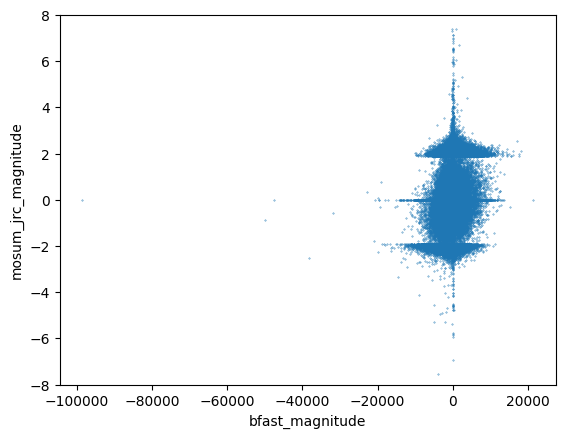

In [7]:
final_df.plot(x='bfast_magnitude', y='mosum_jrc_magnitude', kind='scatter', s=0.1, ylim=[-8, 8], xlim=[-40000, 25000])

<AxesSubplot:xlabel='cusum_magnitude', ylabel='mosum_jrc_magnitude'>

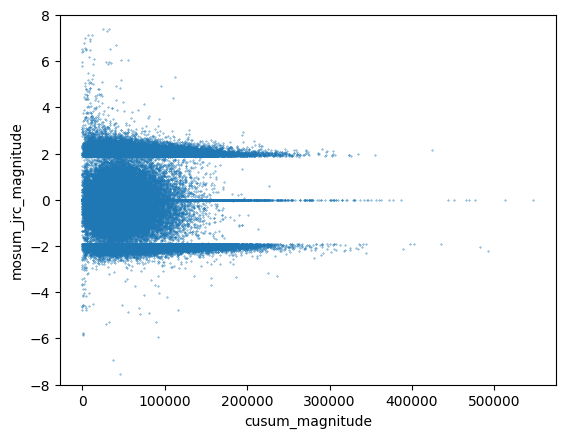

In [8]:
final_df.plot(x='cusum_magnitude', y='mosum_jrc_magnitude', kind='scatter', s=0.1, ylim=[-8, 8])

<AxesSubplot:xlabel='cusum_magnitude', ylabel='cusum_jrc_magnitude'>

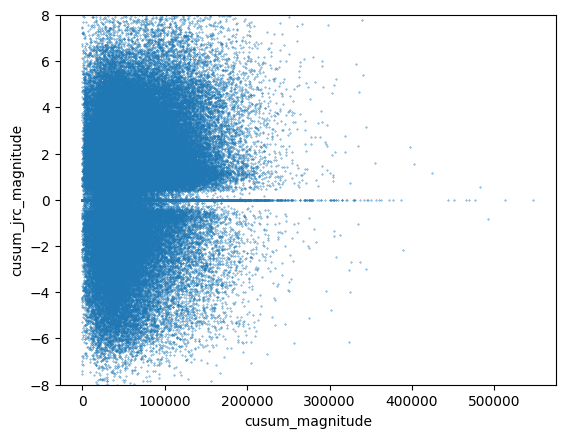

In [9]:
final_df.plot(x='cusum_magnitude', y='cusum_jrc_magnitude', kind='scatter', s=0.1, ylim=[-8, 8])

<AxesSubplot:xlabel='mosum_jrc_magnitude', ylabel='cusum_jrc_magnitude'>

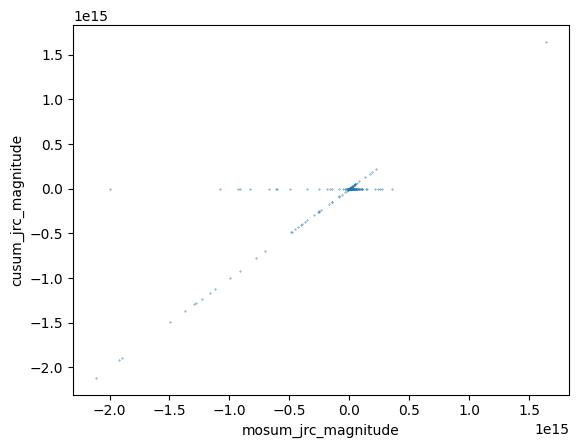

In [11]:
final_df.plot(x='mosum_jrc_magnitude', y='cusum_jrc_magnitude', kind='scatter', s=0.1)

<AxesSubplot:xlabel='ewma_jrc_magnitude', ylabel='cusum_jrc_magnitude'>

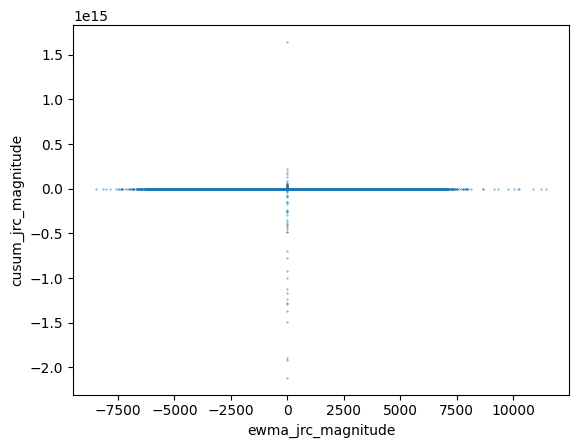

In [12]:
final_df.plot(x='ewma_jrc_magnitude', y='cusum_jrc_magnitude', kind='scatter', s=0.1)